- 데이터셋 : used cars_data.csv

In [36]:

# [1-1] 모듈 로딩
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [37]:
data= pd.read_csv('../Data/used_cars_data.csv', index_col='S.No.')
carDF = pd.DataFrame(data)

In [38]:
carDF['Transmission'].value_counts(dropna=False)

Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64

In [39]:
Car=carDF.copy()

In [40]:
Car.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [41]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [42]:
Car.shape

(7253, 13)

In [43]:
# 각 컬럼별 고유값 개수 확인
# 범주형, 연속형 데이터 확인
for i in Car.columns:
    print(i, len(Car[i].unique()))

Name 2041
Location 11
Year 23
Kilometers_Driven 3660
Fuel_Type 5
Transmission 2
Owner_Type 4
Mileage 451
Engine 151
Power 387
Seats 10
New_Price 626
Price 1374


In [44]:
# 결측치 확인: Mileage, Engine, Power, Seats, New_Price,                                    
Car.isna().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [45]:
car_df = Car.drop(columns='New_Price')
car_df = Car.drop(index = Car[Car['Engine'].isna()].index)
car_df.loc[Car['Seats'].isna(),'Seats'] = [5,5,5,7,5,5,5]
car_df.loc[Car['Mileage'].isna(), 'Mileage'] = [0,0]

In [46]:
car_df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [47]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7207 non-null   object 
 1   Location           7207 non-null   object 
 2   Year               7207 non-null   int64  
 3   Kilometers_Driven  7207 non-null   int64  
 4   Fuel_Type          7207 non-null   object 
 5   Transmission       7207 non-null   object 
 6   Owner_Type         7207 non-null   object 
 7   Mileage            7207 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7207 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              5983 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 788.3+ KB


In [48]:
car_df.shape

(7207, 13)

In [49]:
print(car_df['Transmission'].unique())

['Manual' 'Automatic']


In [50]:
# 각 컬럼별 고유값 개수 확인
# 범주형, 연속형 데이터 확인
for i in car_df.columns:
    print(i, len(car_df[i].unique()))

Name 2021
Location 11
Year 23
Kilometers_Driven 3645
Fuel_Type 5
Transmission 2
Owner_Type 4
Mileage 451
Engine 150
Power 386
Seats 9
New_Price 626
Price 1370


In [51]:
# 결측치 확인: Mileage, Engine, Power, Seats, New_Price,                                    
car_df.isna().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6201
Price                1224
dtype: int64

In [ ]:
# 한번만 삭제해야함
# car_df = car_df.drop(columns='New_Price')
# car_df = car_df.drop(index = car_df[car_df['Engine'].isna()].index)
# car_df.loc[car_df['Seats'].isna(),'Seats'] = [5,5,5,7,5,5,5]
# car_df.loc[car_df['Mileage'].isna(), 'Mileage'] = [0,0]

ValueError: Must have equal len keys and value when setting with an iterable

In [53]:
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [54]:
# Object 타입 컬럼 수치형으로  변경
car_df['Mileage'] = car_df['Mileage'].apply(lambda x: str(x).split()[0] if isinstance(x, str) else x)
car_df["Engine"] = car_df["Engine"].apply(lambda x: str(x).split()[0])
car_df["Power"] = car_df["Power"].apply(lambda x: str(x).split()[0])

In [55]:
car_df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1224
dtype: int64

In [56]:
# 'null'로 된 문자열 제거
car_df = car_df.drop(index=car_df[car_df['Power']=='null'].index)

In [ ]:
car_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,NaN


In [ ]:
# name 컬럼 - 차량 이름 앞의 브랜드명 추출(ex. 현대) / 모델명 추출
car_df['Brand'] = car_df['Name'].str.split(' ').str[0]
car_df['Model'] = car_df['Name'].str.split(' ').str[1] + car_df['Name'].str.split(' ').str[2]

In [ ]:
car_df['Brand'].unique() # >> Isuzu, ISUZU 같음

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini',
       'OpelCorsa'], dtype=object)

In [ ]:
car_df['Brand'] = car_df['Brand'].str.replace('ISUZU','Isuzu' )
car_df.loc[car_df['Model'].isna(),'Model'] = 'Corsa'

In [ ]:
car_df["Brand"] = car_df["Brand"].astype("category")
car_df["Model"] = car_df["Model"].astype("category")

In [ ]:
# 제조년도 & 현재년도 => 연식 계산
car_df['Current_year']=2025
car_df['car_Age']=car_df['Current_year']-car_df['Year'] 
car_df.drop('Current_year',axis=1,inplace=True)

In [ ]:
car_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Ageofcar', 'Car_Size',
       'Price_Class'],
      dtype='object')

In [ ]:
carDF.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


price의 null값 1200개 처리
- 5876/7078 = 0.8301780163888104
- 약 17%. test size를 0.17로 처리했다고 생각하고. 
- 예측모델을 만든 후 price 가 null인 것을 예측 모델에 넣어 데이터 만들기

In [ ]:
car_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Ageofcar
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74,Audi,A4New,12


In [57]:
# 배기량 기준에 따라 Car_Size 등급 (숫자) 컬럼 생성

# 문자열로 되어있는 Engine 컬럼을 숫자로 변환
car_df['Engine'] = pd.to_numeric(car_df['Engine'], errors='coerce')

def car_size(cc):
    if pd.isna(cc):
        return 0  # 엔진 정보 없는 경우 0
    elif cc <= 1200:
        return 1  # 경차
    elif cc <= 1500:
        return 2  # 소형차
    elif cc <= 2000:
        return 3  # 중형차
    else:
        return 4  # 대형차

# 적용
car_df['Car_Size'] = car_df['Engine'].apply(car_size)

In [58]:
# 환율 적용 (예시: 1 INR = 15 KRW)
exchange_rate = 16.73

# 중고차 가격을 한국 원화로 변환 후 '백만원' 단위로 변환
car_df['Price'] = (car_df['Price'] * 100000 * exchange_rate) / 1000000

# 결과 출력
print(car_df[['Price']])

          Price
S.No.          
0       2.92775
1      20.91250
2       7.52850
3      10.03800
4      29.67902
...         ...
7248        NaN
7249        NaN
7250        NaN
7251        NaN
7252        NaN

[7078 rows x 1 columns]


In [59]:
car_df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [60]:
pnull_df= car_df.loc[car_df[car_df['Price'].isna()].index, :] # Price가 결측치인 행
new_df = car_df.loc[car_df[~car_df['Price'].isna()].index, :] # Price가 결측치 아닌 데이터

In [ ]:
new_df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Ageofcar,Car_Size
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,2.92775,Maruti,WagonR,15,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,20.91250,Hyundai,Creta1.6,10,3
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,7.52850,Honda,JazzV,14,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,10.03800,Maruti,ErtigaVDI,13,2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,29.67902,Audi,A4New,12,3


In [ ]:
from sklearn.preprocessing import  OrdinalEncoder


In [ ]:
orEn = OrdinalEncoder()
new_df['Owner_Type'] = orEn.fit_transform(new_df[['Owner_Type']]) # 몇번째의 주인

In [ ]:
new_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Ageofcar,Car_Size
S.No.,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,0.0,26.6,998,58.16,5.0,NaN,2.92775,Maruti,WagonR,15,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,0.0,19.67,1582,126.2,5.0,NaN,20.91250,Hyundai,Creta1.6,10,3
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,0.0,18.2,1199,88.7,5.0,8.61 Lakh,7.52850,Honda,JazzV,14,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,0.0,20.77,1248,88.76,7.0,NaN,10.03800,Maruti,ErtigaVDI,13,2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2.0,15.2,1968,140.8,5.0,NaN,29.67902,Audi,A4New,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,0.0,28.4,1248,74,5.0,7.88 Lakh,7.94675,Maruti,SwiftVDI,11,2
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,0.0,24.4,1120,71,5.0,NaN,6.69200,Hyundai,Xcent1.1,10,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,2.0,14.0,2498,112,8.0,NaN,4.85170,Mahindra,XyloD4,13,4


In [ ]:
print(car_df['Transmission'].unique())

['Manual' 'Automatic']


[고가/저가 분류하기]
- 타겟: Price_Class
- 모델: 의사결정트리(분류)

In [62]:
# 범주형 데이터 인코딩: 모델은 문자를 이해할 수 없어 숫자로 변환해야 함
# 즉, 모델이 처리하는 DT: 숫자 행렬
car_df['Fuel_Type'] = car_df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})
# car_df['Transmission'] = car_df['Transmission'].map({'Manual': 0, 'Automatic': 1})
car_df['Owner_Type'] = car_df['Owner_Type'].map({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4})

In [ ]:
car_df.Mileage.unique()

array(['26.6', '19.67', '18.2', '20.77', '15.2', '21.1', '23.08', '11.36',
       '20.54', '22.3', '21.56', '16.8', '25.2', '12.7', '0.0', '13.5',
       '25.8', '28.4', '20.45', '14.84', '22.69', '23.65', '13.53',
       '18.5', '14.4', '20.92', '17.5', '12.8', '19.01', '14.53', '11.18',
       '12.4', '16.09', '14.0', '24.3', '18.15', '11.74', '22.07', '19.7',
       '25.4', '25.32', '14.62', '14.28', '14.9', '11.25', '24.4',
       '16.55', '17.11', '22.9', '17.8', '18.9', '15.04', '25.17',
       '20.36', '13.29', '13.68', '20.0', '15.8', '25.0', '16.4', '24.52',
       '22.1', '8.5', '15.1', '16.95', '19.64', '16.5', '18.53', '17.57',
       '18.0', '23.2', '16.73', '13.0', '17.68', '22.7', '16.2', '15.26',
       '23.0', '19.83', '14.94', '17.0', '17.71', '14.74', '16.0',
       '22.32', '12.99', '23.3', '19.15', '10.8', '15.0', '22.0', '21.9',
       '12.05', '11.7', '21.21', '20.73', '24.07', '19.0', '20.58',
       '19.27', '11.5', '18.6', '21.14', '11.05', '21.76', '7.81',
  

In [ ]:
# 사용할 피쳐
features = ['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Power', 'Seats']

In [ ]:
X = car_df[features]
y = car_df['Price_Class']

In [63]:
# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

학습  
- 의사결정 트리 모델

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
dt = DecisionTreeClassifier()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
car_df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
## 한번만 돌아가야 함
# # 1. Transmission 인코딩 (0: Manual, 1: Automatic)
# car_df['Transmission'] = car_df['Transmission'].map({'Manual': 0, 'Automatic': 1})


# 2. 사용할 피쳐 선정
features_selected = ['Year', 'Kilometers_Driven', 'Fuel_Type',
                     'Mileage', 'Power', 'Price', 'Engine']

X = car_df[features_selected]
y = car_df['Transmission']  # 예측할 대상

# 3. 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 의사결정트리 모델
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 5. 예측
y_pred = model.predict(X_test)

# 6. 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f"\n[Transmission 예측] 모델 정확도: {accuracy:.4f}")

# 7. 피쳐 중요도
importances = model.feature_importances_
print("\n[Transmission 예측] 피쳐 중요도:")
for feature, importance in zip(features_selected, importances):
    print(f"{feature}: {importance:.4f}")


[Transmission 예측] 모델 정확도: 0.8879

[Transmission 예측] 피쳐 중요도:
Year: 0.0031
Kilometers_Driven: 0.0019
Fuel_Type: 0.0128
Mileage: 0.0318
Power: 0.8468
Price: 0.0610
Engine: 0.0428


In [103]:
## 한번만 돌아가야 함
# # 1. Transmission 인코딩 (0: Manual, 1: Automatic)
# car_df['Transmission'] = car_df['Transmission'].map({'Manual': 0, 'Automatic': 1})


# 2. 사용할 피쳐 선정
features_selected = ['Year', 'Kilometers_Driven',
                     'Power', 'Price', 'Engine', 'Mileage']

X = car_df[features_selected]
y = car_df['Transmission']  # 예측할 대상

# 3. 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 의사결정트리 모델
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 5. 예측
y_pred = model.predict(X_test)

# 6. 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f"\n[Transmission 예측] 모델 정확도: {accuracy:.4f}")

# 7. 피쳐 중요도
importances = model.feature_importances_
print("\n[Transmission 예측] 피쳐 중요도:")
for feature, importance in zip(features_selected, importances):
    print(f"{feature}: {importance:.4f}")


[Transmission 예측] 모델 정확도: 0.8879

[Transmission 예측] 피쳐 중요도:
Year: 0.0046
Kilometers_Driven: 0.0085
Power: 0.8518
Price: 0.0562
Engine: 0.0522
Mileage: 0.0268


In [83]:
# 학습 모델 시각화 파일 저장
class_names = [str(c) for c in y_train.unique()] # class_names 
export_graphviz(model, out_file='3_0.dot', feature_names=X_train.columns, class_names=class_names)

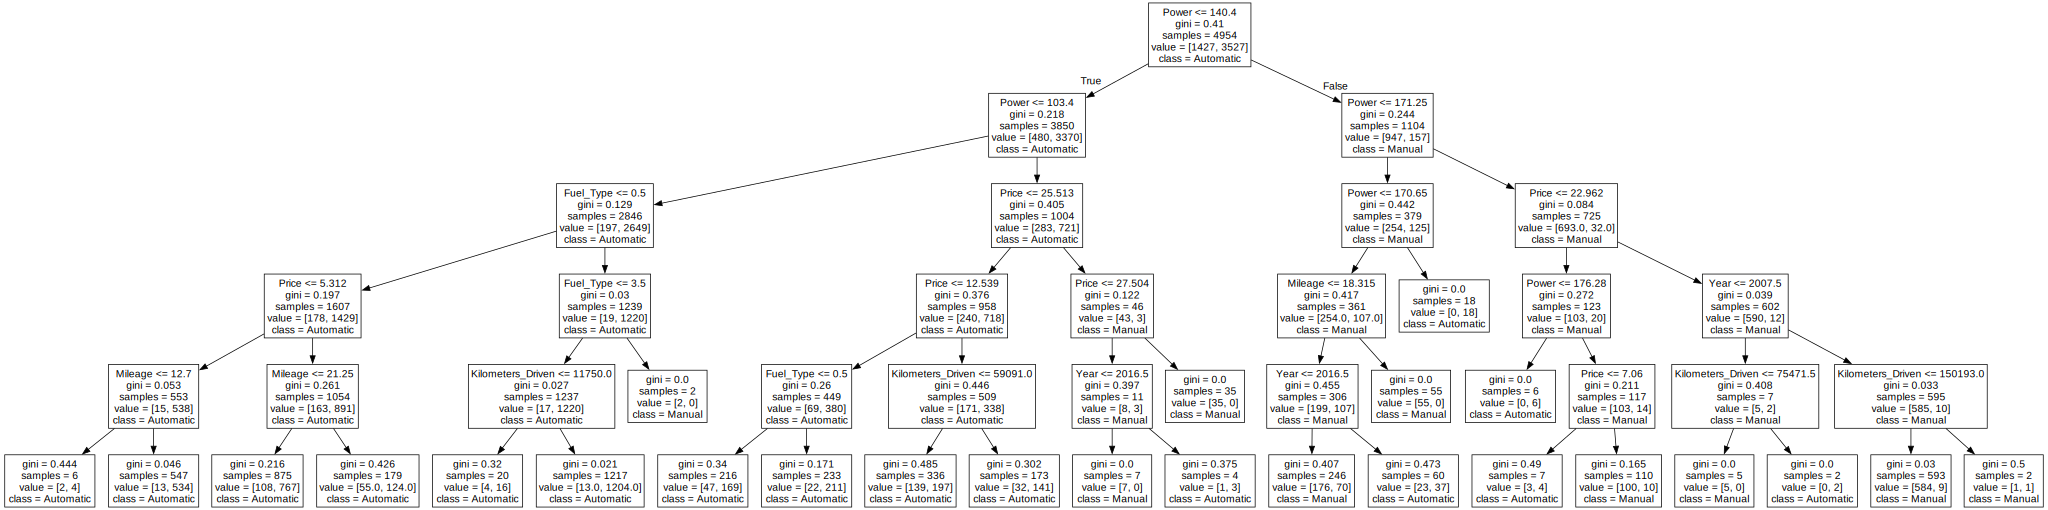

In [84]:
## 모델 파일 dot ===> 시각화
import graphviz

## 파일 열기 
with open('3_0.dot') as f:
    data=f.read()

    # 파일에서 가져온 데이터 ==> 시각화
    # print(data)
graphviz.Source(data)

In [85]:
##  훈련용 성능과 테스트용 성능평가
## [1] 모델의 성능평가 메서드 : score()  accuracy로 성능평가 결과 반환
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'[Train] score : {train_score},  [Test] score : {test_score}')

[Train] score : 0.8885748889786032,  [Test] score : 0.8818267419962336


In [86]:
## [2] 다양한 성능평가 지표 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('[TRAIN]------------------------')
train_pre = model.predict(X_train)

print(f'정확도 : {accuracy_score(y_train, train_pre) }')
print(f'정밀도 : {precision_score(y_train, train_pre, average="macro") }')
print(f'재현율 : {recall_score(y_train, train_pre,average="macro") }')
print(f'f1점수 : {f1_score(y_train, train_pre,average="macro") }')

[TRAIN]------------------------
정확도 : 0.8885748889786032
정밀도 : 0.898100011061288
재현율 : 0.8253632156699275
f1점수 : 0.8516326438045823


In [87]:
print('[TEST]------------------------')
test_pre = model.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, test_pre) }')
print(f'정밀도 : {precision_score(y_test, test_pre, average="macro") }')
print(f'재현율 : {recall_score(y_test, test_pre, average="macro") }')
print(f'f1점수 : {f1_score(y_test, test_pre, average="macro") }')

[TEST]------------------------
정확도 : 0.8818267419962336
정밀도 : 0.8806334891207511
재현율 : 0.8191272965879266
f1점수 : 0.8423366367905432


In [88]:
## [3] 손실/비용 계산 => 확률값으로 
from sklearn.metrics import log_loss


proba = model.predict_proba(X_train)
probatest = model.predict_proba(X_test)

train_loss = log_loss(y_train, proba)
test_loss = log_loss(y_test, probatest)

In [113]:
print(f'[Train Loss] {train_loss}  [Test Loss] {test_loss}')

[Train Loss] 0.2738680650016699  [Test Loss] 0.392909874564453


교차 검증 , CV

In [114]:
## 모듈로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## 하이퍼파라미터 dict
param={'max_depth': [2,3,5], 'criterion':['gini','entropy','log_loss']}

## 모델 인스턴스 생성
lmodel = DecisionTreeClassifier()

## 교차검증과 튜닝 진행 인스턴스 생성
gridCV = GridSearchCV(lmodel, param, scoring=('accuracy'), refit=True) 

gridCV.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5]},
             scoring='accuracy')

In [115]:
## 교차검증 및 튜닝 후 결과 
print(f'가장 좋은 성능의 cv 번호            : {gridCV.best_index_}')
print(f'가장 좋은 성능의 하이퍼파라미터 조합 : {gridCV.best_params_}')
print(f'가장 좋은 성능의 점수               : {gridCV.best_score_}')
print(f'가장 좋은 성능의 재학습된 모델객체   : {gridCV.best_estimator_}')

가장 좋은 성능의 cv 번호            : 2
가장 좋은 성능의 하이퍼파라미터 조합 : {'criterion': 'gini', 'max_depth': 5}
가장 좋은 성능의 점수               : 0.8869606254268211
가장 좋은 성능의 재학습된 모델객체   : DecisionTreeClassifier(max_depth=5)


In [116]:
## 가장 좋은 모델 선정 
bestModel=gridCV.best_estimator_

[사용자 입력에 대한 예측]

In [110]:
features_selected

['Year', 'Kilometers_Driven', 'Power', 'Price', 'Engine', 'Mileage']

In [118]:
## 사용자 입력 데이터 =====> 모델 데이터 형태
user_data = pd.DataFrame([[2010, 72000, 58.16, 1.75, 998, 26.6]], columns=features_selected)


In [119]:
bestModel.predict(user_data)


array(['Manual'], dtype=object)

In [125]:
# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"모델 정확도: {accuracy:.4f}")

모델 정확도: 0.8879


In [127]:
## [2] 다양한 성능평가 지표 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('[TRAIN]------------------------')
train_pre = bestModel.predict(X_train)

print(f'정확도 : {accuracy_score(y_train, train_pre) }')
print(f'정밀도 : {precision_score(y_train, train_pre, average="macro") }')
print(f'재현율 : {recall_score(y_train, train_pre,average="macro") }')
print(f'f1점수 : {f1_score(y_train, train_pre,average="macro") }')

[TRAIN]------------------------
정확도 : 0.8980621719822366
정밀도 : 0.9124086508052353
재현율 : 0.8368244053431839
f1점수 : 0.864228945153491


In [126]:
print('[TEST]------------------------')
test_pre = bestModel.predict(X_test)

print(f'정확도 : {accuracy_score(y_test, test_pre) }')
print(f'정밀도 : {precision_score(y_test, test_pre, average="macro") }')
print(f'재현율 : {recall_score(y_test, test_pre, average="macro") }')
print(f'f1점수 : {f1_score(y_test, test_pre, average="macro") }')

[TEST]------------------------
정확도 : 0.8879472693032016
정밀도 : 0.8905754441514597
재현율 : 0.8259186351706036
f1점수 : 0.8502195542544932


In [121]:
# 피쳐 중요도
importances = model.feature_importances_
features = features_selected  # 수정된 부분
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.4f}")

Year: 0.0046
Kilometers_Driven: 0.0085
Power: 0.8518
Price: 0.0562
Engine: 0.0522
Mileage: 0.0268


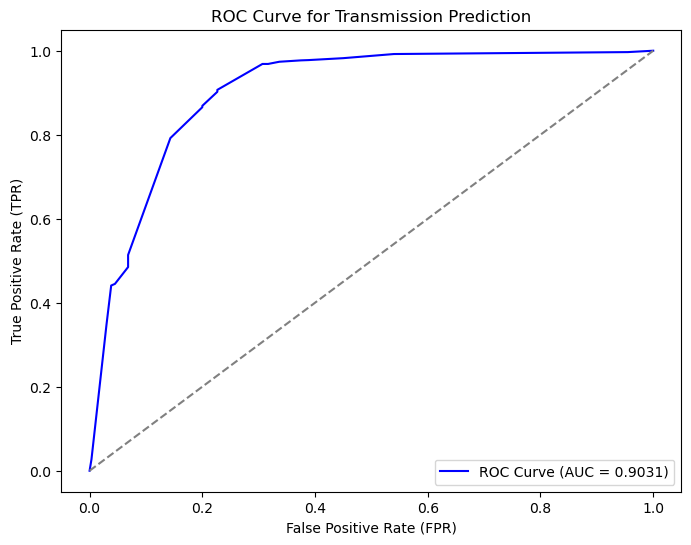

In [123]:
# y_test를 숫자로 변환 (값 바꿈)
y_test_numeric = y_test.map({'Manual': 1, 'Automatic': 0})  # 값 변경

# ROC 곡선 재계산
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_proba)
auc_score = roc_auc_score(y_test_numeric, y_proba)

# 그래프 다시 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Transmission Prediction')
plt.legend(loc='lower right')
plt.show()


In [ ]:
car_df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Ageofcar', 'Car_Size',
       'Price_Class'],
      dtype='object')

In [ ]:
# 'Mileage', 'Engine', 'Power' 컬럼이 문자열인 경우만 변환
if car_df['Mileage'].dtype == 'object':
    car_df['Mileage'] = car_df['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)

if car_df['Engine'].dtype == 'object':
    car_df['Engine'] = car_df['Engine'].str.extract('(\d+)').astype(float)

if car_df['Power'].dtype == 'object':
    car_df['Power'] = car_df['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

# 변환 후 데이터 타입 확인
print(car_df.dtypes)


Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type             float64
Transmission            int64
Owner_Type            float64
Mileage               float64
Engine                  int64
Power                 float64
Seats                 float64
New_Price              object
Price                 float64
Brand                category
Model                category
Ageofcar                int64
Car_Size                int64
Price_Class             int64
dtype: object


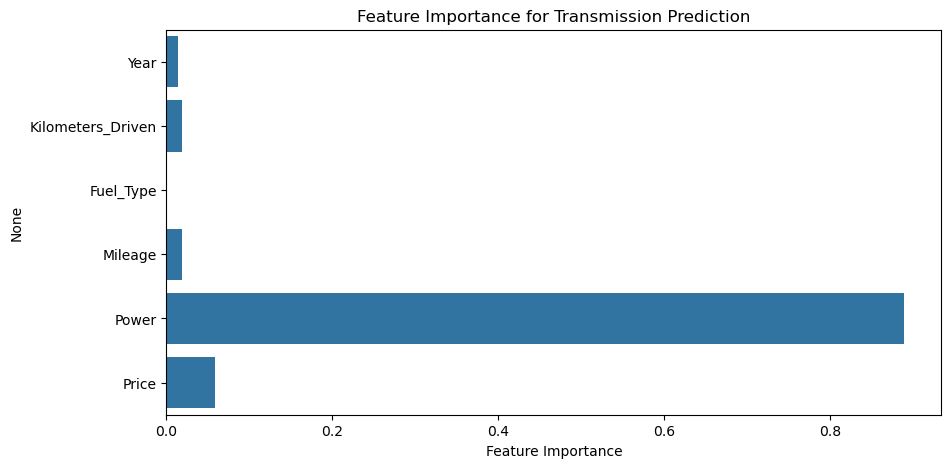

In [ ]:
# Feature Importance 시각화
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Transmission Prediction')
plt.show()

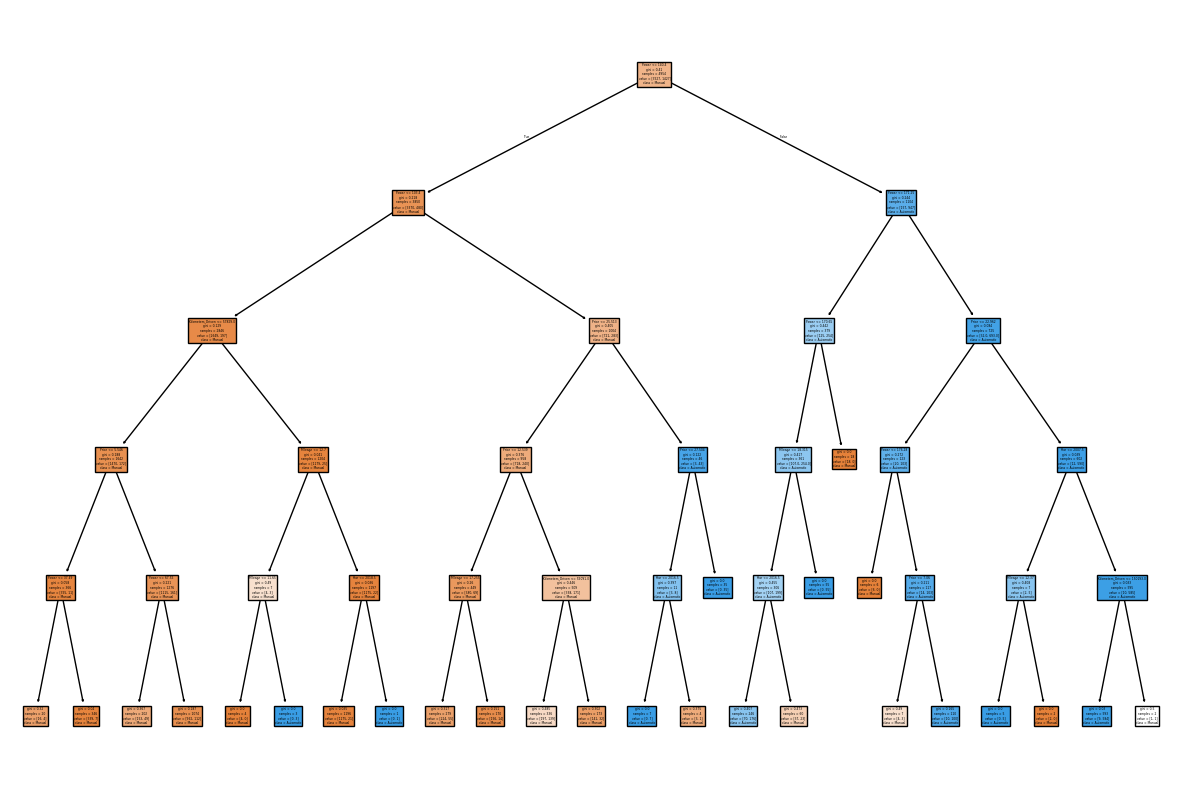

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Manual', 'Automatic'], filled=True)
plt.show()